In [1]:
%matplotlib inline
from keras import *
from keras.layers import *
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import LearningRateScheduler, TensorBoard
from sklearn.neural_networ k import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
df_train = pd.read_csv("train.csv",header=None,delimiter=',',dtype='float64',names=list(range(4096))).fillna(0)
X_train = df_train.get_values()
df_label = pd.read_csv("train_label.csv",delimiter=',')
Y_train = df_label['category'].get_values()
Y_train = Y_train.reshape(-1,1)
print(X_train.shape)

x_test = pd.read_csv("test.csv",header=None,delimiter=',',dtype='float64',names=list(range(4096))).fillna(0)
X_test = df_train.get_values()
print(x_test.shape)


Using TensorFlow backend.


(113636, 4096)
(133223, 4096)


In [9]:
maxlen = 4096
embed_size = 128
def scheduler(epoch):
    if epoch%1==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.5)
        print("lr changed to {}".format(lr*.5))
    return K.get_value(model.optimizer.lr)

lr_decay = LearningRateScheduler(scheduler)

main_input = Input(shape=(maxlen,), dtype='float64',name='main_input')
emb = Embedding(256, embed_size, input_length=maxlen,embeddings_regularizer=regularizers.l2(1e-4))(main_input)
x = Flatten()(emb)

num_layers = 2
for i in range(num_layers):
    x = Dense(10, activation='linear',kernel_regularizer=regularizers.l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = ELU()(x)
    x = Dropout(0.5)(x)

loss_out = Dense(1, activation='sigmoid',name='loss_out')(x)
model = Model(inputs=[main_input], outputs=[loss_out])
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='binary_crossentropy', metrics=['mse', 'accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=200, epochs=4, verbose=1, callbacks=[lr_decay], validation_split=0.1, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

Train on 102272 samples, validate on 11364 samples
Epoch 1/4
102272/102272 [==============================] - 715s 7ms/step - loss: 0.3166 - mean_squared_error: 0.0850 - acc: 0.8895 - val_loss: 0.4290 - val_mean_squared_error: 0.1220 - val_acc: 0.8270
Epoch 2/4
lr changed to 0.0005000000237487257
102272/102272 [==============================] - 804s 8ms/step - loss: 0.1734 - mean_squared_error: 0.0361 - acc: 0.9592 - val_loss: 0.2449 - val_mean_squared_error: 0.0600 - val_acc: 0.9286
Epoch 3/4
lr changed to 0.0002500000118743628
102272/102272 [==============================] - 764s 7ms/step - loss: 0.1362 - mean_squared_error: 0.0263 - acc: 0.9706 - val_loss: 0.2185 - val_mean_squared_error: 0.0530 - val_acc: 0.9315
Epoch 4/4
lr changed to 0.0001250000059371814
102272/102272 [==============================] - 718s 7ms/step - loss: 0.1145 - mean_squared_error: 0.0211 - acc: 0.9774 - val_loss: 0.1166 - val_mean_squared_error: 0.0244 - val_acc: 0.9688


dict_keys(['val_loss', 'val_mean_squared_error', 'val_acc', 'loss', 'mean_squared_error', 'acc'])


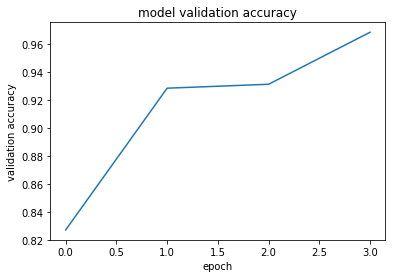

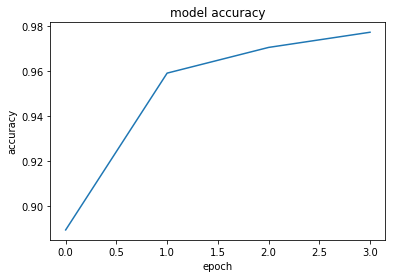

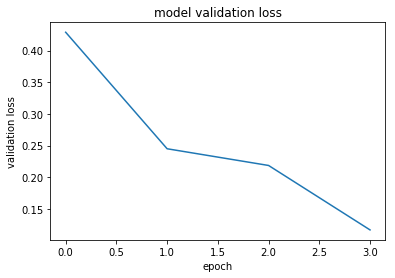

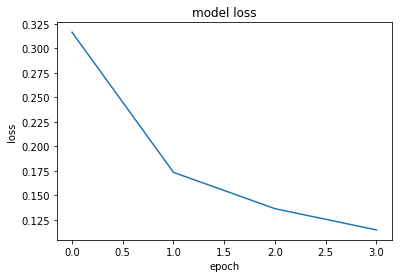

In [12]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_acc'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
y=model.predict(x_test, batch_size=None, verbose=0, steps=None)
print(y.shape[0])

s=np.arange(y.shape[0]).astype(int)
a= np.zeros((y.shape[0],2)) 
a= np.vstack([s,y.reshape(-1)])
print(a.T)
np.savetxt("out.csv", a.T, delimiter=',', fmt='%i,%f', header="sample_id,malware", comments="")

In [ ]:
# model.save_weights('mlp_weights_98722.h5')
# model.save('mlp_98722.h5')